## Classes

In [13]:
import numpy as np

class Hamming:
    def __init__(self,input,eps=-1,norm=0.1,F=-1):
        self.Input=input
        self.T=len(input[0])/2
        self.eps=1/len(input)if eps==-1 else eps
        self.F=len(input)if eps==-1 else eps
        self.norm=norm
        self.W=input/2
        self.V=np.identity(len(input))-self.eps+np.identity(len(input))*self.eps

    def func(self,vect):
        for i in range(len(vect)):
            if(vect[i]<=0):
                vect[i]=0
            elif(vect[i]>=self.F):
                vect[i]=self.F
        return vect

    def res(self,vect):
        vect=np.around(vect,decimals=0)
        if np.count_nonzero(vect)>1 or np.count_nonzero(vect)==0:
            return "Класс не распознан"
        else:
            return "Объект принадлежит классу %d"%(np.flatnonzero(vect)[0])
                
    def compute(self,vect):
        y1=np.dot(self.W,vect)+self.T
        y2=self.func(np.dot(self.V,y1))
        while np.linalg.norm(y2-y1)>self.norm:
            y1=y2
            y2=self.func(np.dot(self.V,y1))
        return y2
    
    def getRes(self,vect):
        return self.res(self.compute(vect))

## Work

In [14]:
import sys
from Classes import *
input=np.array([
    [1,-1,1,-1,1,-1,1,-1,1],
    [-1,1,-1,1,1,1,-1,1,-1],
    [1,1,1,1,-1,1,1,1,1]])

test=Hamming(input)

In [15]:
vect=np.array([1,-1,-1,-1,1,-1,1,-1,1])
test.getRes(vect)

'Объект принадлежит классу 0'

In [16]:
vect1=np.array([1,1,1,-1,-1,-1,1,1,1])
test.getRes(vect1)

'Класс не распознан'

## Indexes

### Входные значения

In [5]:
indexes=np.array([
    #0
    [1, 1, 1, 1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #1
    [-1,-1,-1,-1,1,
     -1,-1,-1,1,1,
     -1,-1,1,-1,1,
     -1,1,-1,-1,1,
      1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1],
    #2
    [ 1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
     1,1,1,1,1],
    #3
    [
      1,1,1,1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1,1,1,1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1, -1, -1, -1,-1],
    #4
    [   1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
      1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1
    ],
    #5
      [1, 1, 1, 1,1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #6
    [-1,-1,-1,-1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1,1,1,1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #7
    [1,1,1,1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
         1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1, -1, -1, -1,-1],
    #8
    [1, 1, 1, 1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,1,1,1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #9
    [1, 1, 1, 1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,1,1,1,1,
       -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1, -1, -1, -1,-1]
    
])

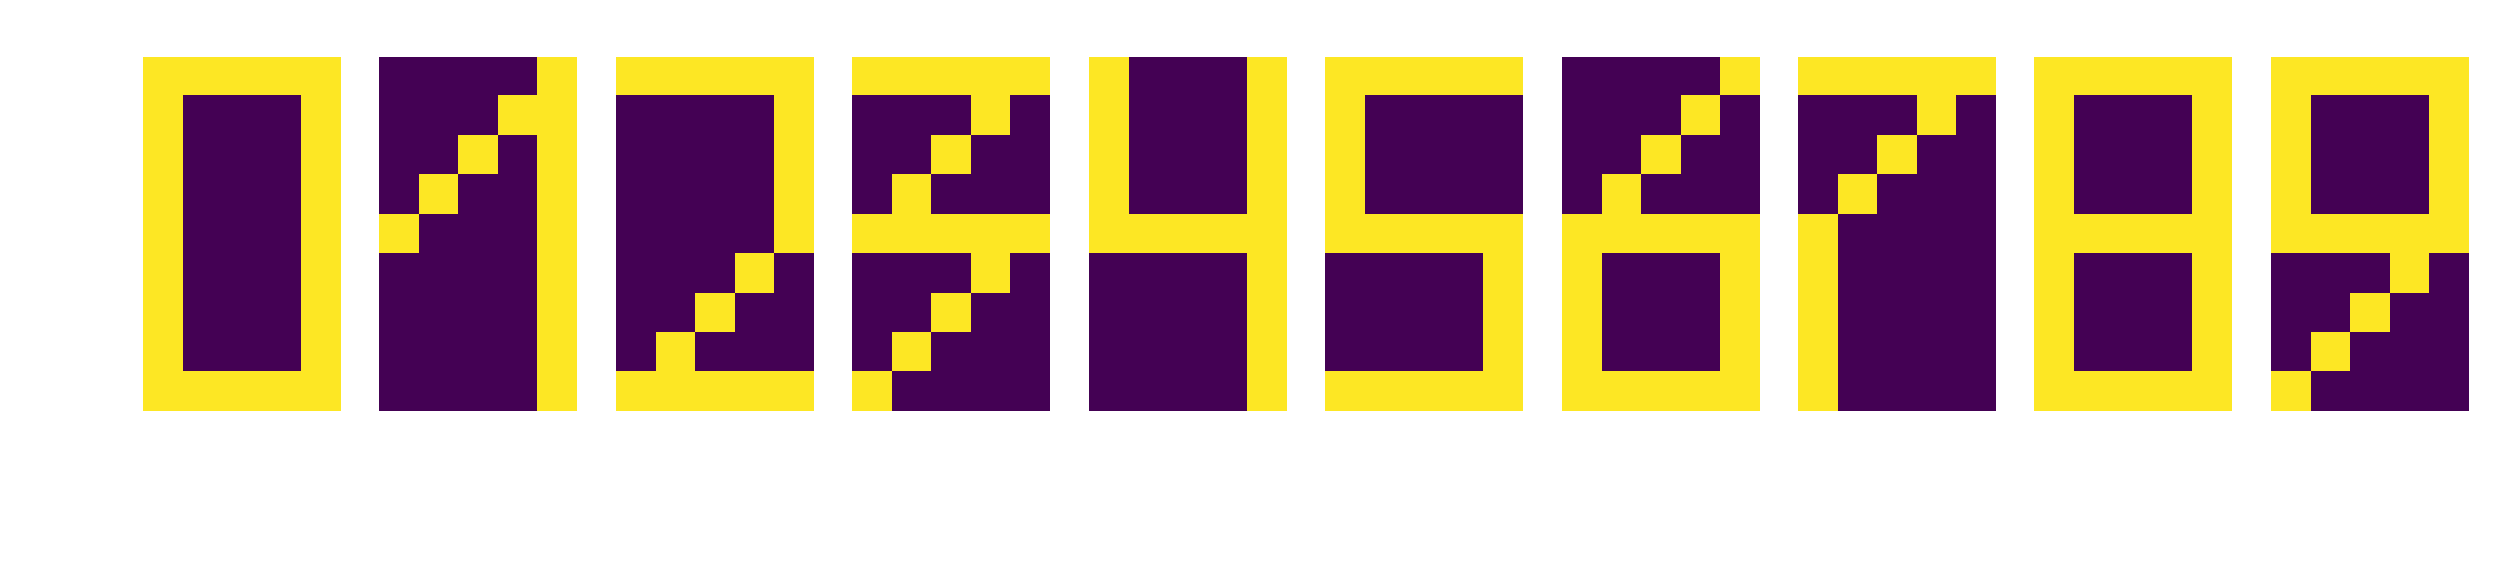

In [17]:
import matplotlib.pyplot as pl
%matplotlib inline
fig,axs=pl.subplots(1,10,dpi=500)
net=Hamming(indexes)
for i in range(10):
    axs[i].imshow(indexes[i].reshape((9,5)))
    axs[i].axis("off")
pl.show()

In [18]:
net=Hamming(indexes)
for i in range(10):
    print("%s\n"%net.compute(indexes[i]))
    print("%s\n"%net.getRes(indexes[i]))

[0.61252772 0.         0.         0.         0.         0.
 0.         0.         0.61252772 0.        ]

Класс не распознан

[0.        4.0286614 0.        0.        0.        0.        0.
 0.        0.        0.       ]

Объект принадлежит классу 1

[0.         0.         5.72304323 0.         0.         0.
 0.         0.         0.         0.        ]

Объект принадлежит классу 2

[0.         0.         0.         1.63546103 0.         0.
 0.         0.         0.         0.        ]

Объект принадлежит классу 3

[0.       0.       0.       0.       4.580495 0.       0.       0.
 0.       0.      ]

Объект принадлежит классу 4

[0.         0.         0.         0.         0.         0.59479217
 0.         0.         0.59479217 0.        ]

Класс не распознан

[0.     0.     0.     0.     0.     0.     6.2576 0.     0.     0.    ]

Объект принадлежит классу 6

[0.         0.         0.         0.         0.         0.
 0.         2.93246029 0.         0.        ]

Объект принадлежит 

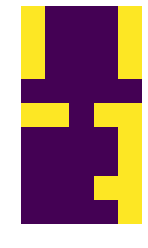

In [19]:
check= np.array( [   1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     -1,-1,-1,-1,-1,
      1,1,-1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,1,1,
     -1,-1,-1,-1,1
    ])
pl.imshow(check.reshape((9,5)))
pl.axis("off")
pl.show()

In [20]:
net.getRes(check)

'Объект принадлежит классу 4'